**Importing necessary Basic Libraries**<br>
1.pandas, numpy- data handling<br>
2.nltk- natural language toolkit<br>
3.re- regular expression, string matching

In [1]:
import pandas as pd
import numpy as np
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
data = pd.read_csv("pig.csv")
import nltk
import re

**Check Data for Null values**

In [2]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


**Using Stopwords**<br>
**Using nltk.corpus**<br>
Will remove common words<br>
Will remove punctuations within sentences<br>

In [3]:
nltk.download('stopwords')
stemmer= nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
    

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


**Captuturing Image  using cv2**

In [4]:
videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imwrite("NewPicture.jpg",frame)
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()

image=cv2.imread("NewPicture.jpg")
resultimg=DeepFace.analyze(image,actions=['emotion'])

**Labelling Data Set**<br>
As this is a binary classification model we have used *Stress for 1 Label* and *No Stress for 0 Label* as the DataSet is already Annotated with 0 and 1.

In [5]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text","label"]]
print(data.head())

                                                text      label
0  I want to die. I want to to kill. I want to co...     Stress
1  Hey there r/assistance, Not sure if this is th...  No Stress
2  My mom then hit me with the newspaper and it s...     Stress
3  until i met my new boyfriend, he is amazing, h...     Stress
4                                  I want to suicide     Stress


##***Visualizing Some Inferences***##

**No of People vs their confidence**

Text(0.5, 1.0, 'Confidence in Population of Dataset')

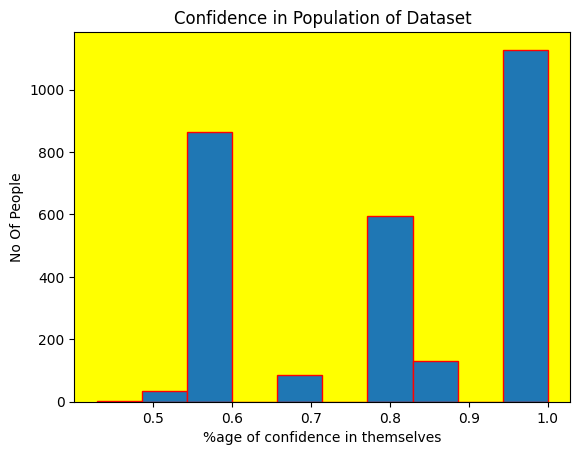

In [6]:
df = pd.read_csv("pig.csv")
df['confidence'].hist(edgecolor="red")
plt.grid(False)
ax = plt.gca()
ax.set_facecolor("yellow")
plt.xlabel('%age of confidence in themselves')
plt.ylabel('No Of People')
plt.title('Confidence in Population of Dataset')


**No of People Stressed vs non stressed Pie Chart**

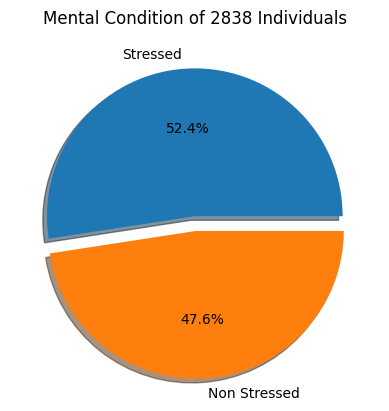

In [7]:
Sign=['Stressed','Non Stressed']
share=[1488,1350]
plt.pie(share, labels=Sign, shadow=True, explode=(0,0.1),autopct='%1.1f%%')
plt.title("Mental Condition of 2838 Individuals")
plt.show()

**Train-Test Data Splitting**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x = np.array(data["text"])
y = np.array(data["label"])
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

**Importing Naive-Bayes Classifier**<br>
Binary Classifier for Binary Classification Task<br>
**Using Bernulli NB for classification** 

In [9]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

**Taking Caption from user and Telling prediction using output of Model**

In [10]:
user = input("Enter a Paragraph: ")
data = cv.transform([user]).toarray()
output = model.predict(data)

#output_array = [{'emotion': {'angry': 4.025661572813988, 'disgust': 1.2471980115336123e-07, 'fear': 0.00013362600839172956, 'happy': 5.1833320968697194e-08, 'sad': 0.6876752246171236, 'surprise': 1.627362280487432e-05, 'neutral': 95.28651237487793}, 'dominant_emotion': 'neutral', 'region': {'x': 28, 'y': 106, 'w': 181, 'h': 181, 'left_eye': (80, 172), 'right_eye': (146, 180)}, 'face_confidence': 0.95}, {'emotion': {'angry': 0.11891988106071949, 'disgust': 3.3836431920231114e-11, 'fear': 0.2769757993519306, 'happy': 0.33597592264413834, 'sad': 2.8971612453460693, 'surprise': 0.0003228718242098694, 'neutral': 96.37064933776855}, 'dominant_emotion': 'neutral', 'region': {'x': 225, 'y': 301, 'w': 33, 'h': 33, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.97}]

for item in output:
    print(f"Dominant Emotion: {item['dominant_emotion']},: {item['emotion'][item['dominant_emotion']]}")

print(resultimg)


['No Stress']
[{'emotion': {'angry': 4.025661572813988, 'disgust': 1.2471980115336123e-07, 'fear': 0.00013362600839172956, 'happy': 5.1833320968697194e-08, 'sad': 0.6876752246171236, 'surprise': 1.627362280487432e-05, 'neutral': 95.28651237487793}, 'dominant_emotion': 'neutral', 'region': {'x': 28, 'y': 106, 'w': 181, 'h': 181, 'left_eye': (80, 172), 'right_eye': (146, 180)}, 'face_confidence': 0.95}, {'emotion': {'angry': 0.11891988106071949, 'disgust': 3.3836431920231114e-11, 'fear': 0.2769757993519306, 'happy': 0.33597592264413834, 'sad': 2.8971612453460693, 'surprise': 0.0003228718242098694, 'neutral': 96.37064933776855}, 'dominant_emotion': 'neutral', 'region': {'x': 225, 'y': 301, 'w': 33, 'h': 33, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.97}]
